In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
data = pd.read_csv('summary_listings.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37784 non-null  int64  
 1   name                            37782 non-null  object 
 2   host_id                         37784 non-null  int64  
 3   host_name                       37778 non-null  object 
 4   neighbourhood_group             37784 non-null  object 
 5   neighbourhood                   37784 non-null  object 
 6   latitude                        37784 non-null  float64
 7   longitude                       37784 non-null  float64
 8   room_type                       37784 non-null  object 
 9   price                           22969 non-null  float64
 10  minimum_nights                  37784 non-null  int64  
 11  number_of_reviews               37784 non-null  int64  
 12  last_review                     

In [4]:
data.shape

(37784, 18)

In [5]:
columns_to_drop = ['id', 'name', 'host_id', 'host_name', 'last_review', 'license']
data = data.drop(columns=columns_to_drop)

In [6]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.shape

(37450, 12)

In [7]:
data.isnull().sum()
data.dropna(subset=['price'], inplace=True)
data.isnull().sum()

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 6831
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

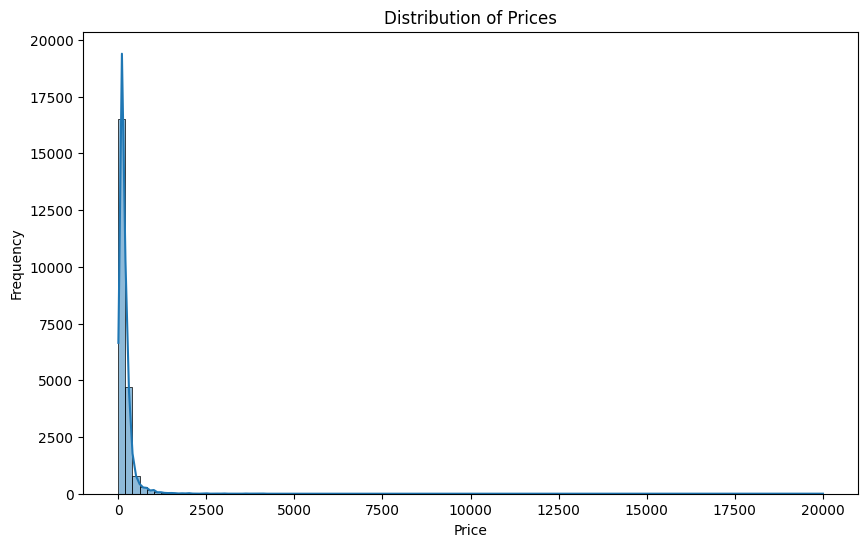

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=100)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

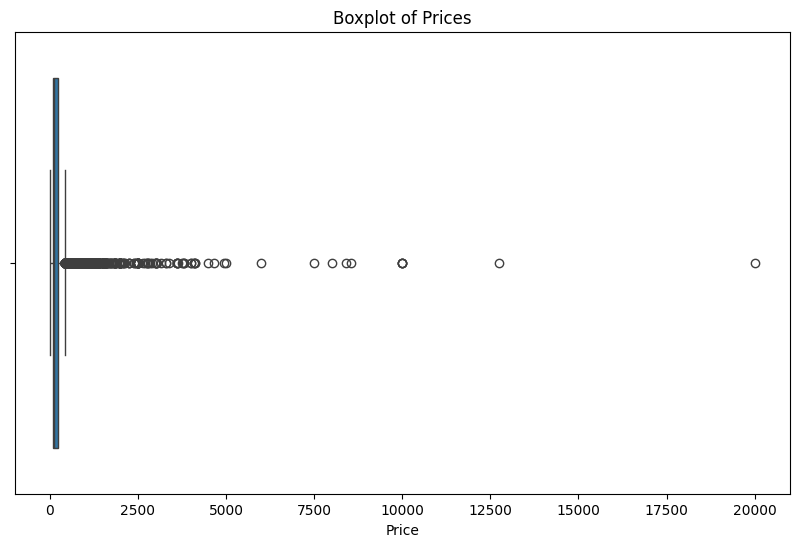

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

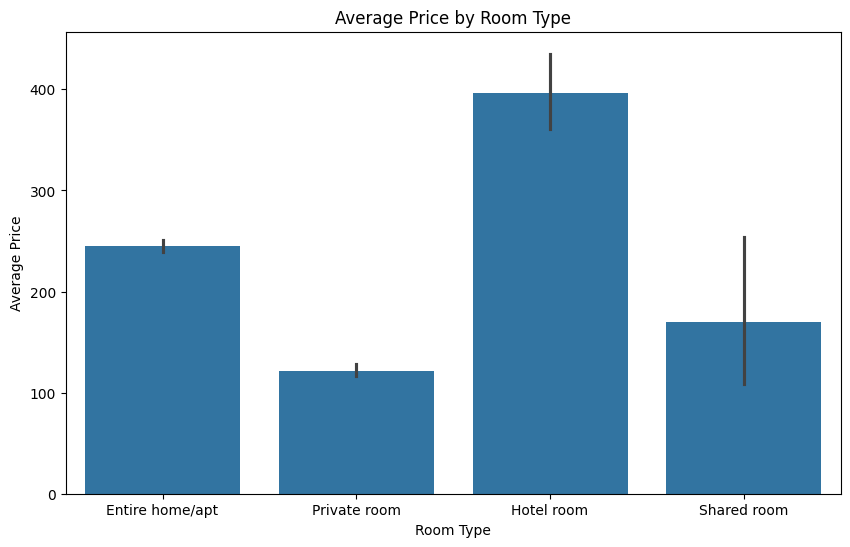

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=data)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

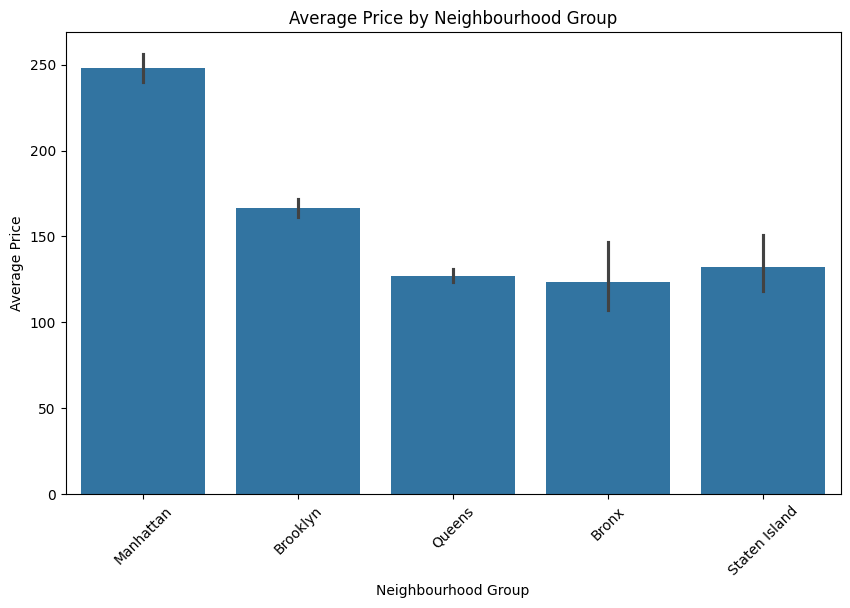

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', data=data)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

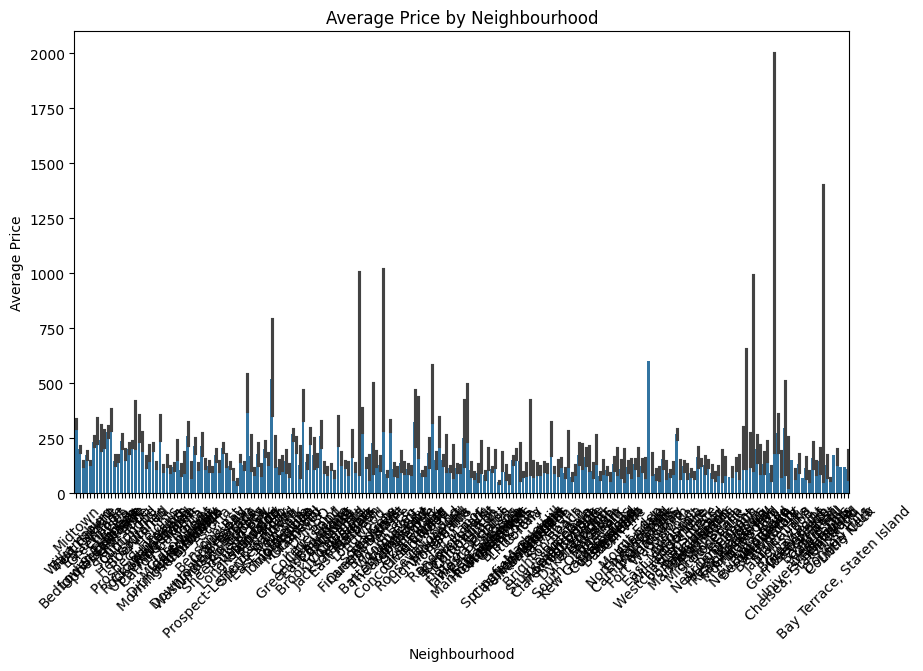

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood', y='price', data=data)
plt.title('Average Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [13]:
data['neighbourhood'].nunique()
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Index: 22740 entries, 0 to 37783
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             22740 non-null  object 
 1   neighbourhood                   22740 non-null  object 
 2   latitude                        22740 non-null  float64
 3   longitude                       22740 non-null  float64
 4   room_type                       22740 non-null  object 
 5   price                           22740 non-null  float64
 6   minimum_nights                  22740 non-null  int64  
 7   number_of_reviews               22740 non-null  int64  
 8   reviews_per_month               15909 non-null  float64
 9   calculated_host_listings_count  22740 non-null  int64  
 10  availability_365                22740 non-null  int64  
 11  number_of_reviews_ltm           22740 non-null  int64  
dtypes: float64(4), int64(5), object(3)
me

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,0.27,3,365,0
1,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0,30,195,1.03,1,196,4
2,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,0.03,2,83,0
3,Manhattan,East Harlem,40.78778,-73.94759,Private room,70.0,30,251,1.36,1,8,5
5,Brooklyn,Fort Greene,40.69194,-73.97389,Private room,205.0,2,395,2.17,2,261,36
...,...,...,...,...,...,...,...,...,...,...,...,...
37779,Bronx,Kingsbridge,40.88178,-73.89973,Entire home/apt,159.0,30,0,NaN,3,365,0
37780,Manhattan,Financial District,40.70610,-74.00666,Entire home/apt,199.0,30,0,NaN,3,306,0
37781,Brooklyn,Crown Heights,40.67013,-73.95874,Private room,99.0,30,0,NaN,21,65,0
37782,Manhattan,Upper West Side,40.79655,-73.97462,Private room,131.0,30,0,NaN,1,83,0


In [14]:
data.describe()
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,0.27,3,365,0
1,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0,30,195,1.03,1,196,4
2,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,0.03,2,83,0
3,Manhattan,East Harlem,40.78778,-73.94759,Private room,70.0,30,251,1.36,1,8,5
5,Brooklyn,Fort Greene,40.69194,-73.97389,Private room,205.0,2,395,2.17,2,261,36


In [15]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['neighbourhood_group', 'room_type']

data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,0.27,3,365,0
1,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0,30,195,1.03,1,196,4
2,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,0.03,2,83,0
3,Manhattan,East Harlem,40.78778,-73.94759,Private room,70.0,30,251,1.36,1,8,5
5,Brooklyn,Fort Greene,40.69194,-73.97389,Private room,205.0,2,395,2.17,2,261,36
...,...,...,...,...,...,...,...,...,...,...,...,...
37779,Bronx,Kingsbridge,40.88178,-73.89973,Entire home/apt,159.0,30,0,NaN,3,365,0
37780,Manhattan,Financial District,40.70610,-74.00666,Entire home/apt,199.0,30,0,NaN,3,306,0
37781,Brooklyn,Crown Heights,40.67013,-73.95874,Private room,99.0,30,0,NaN,21,65,0
37782,Manhattan,Upper West Side,40.79655,-73.97462,Private room,131.0,30,0,NaN,1,83,0


In [16]:
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = pd.DataFrame(onehot_encoder.fit_transform(data[categorical_columns]))
encoded_data.columns = onehot_encoder.get_feature_names_out(categorical_columns)

In [17]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,0.27,3,365,0
1,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0,30,195,1.03,1,196,4
2,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,0.03,2,83,0
3,Manhattan,East Harlem,40.78778,-73.94759,Private room,70.0,30,251,1.36,1,8,5
5,Brooklyn,Fort Greene,40.69194,-73.97389,Private room,205.0,2,395,2.17,2,261,36
...,...,...,...,...,...,...,...,...,...,...,...,...
37779,Bronx,Kingsbridge,40.88178,-73.89973,Entire home/apt,159.0,30,0,NaN,3,365,0
37780,Manhattan,Financial District,40.70610,-74.00666,Entire home/apt,199.0,30,0,NaN,3,306,0
37781,Brooklyn,Crown Heights,40.67013,-73.95874,Private room,99.0,30,0,NaN,21,65,0
37782,Manhattan,Upper West Side,40.79655,-73.97462,Private room,131.0,30,0,NaN,1,83,0


In [18]:
data_new = data.drop(columns=['neighbourhood', 'neighbourhood_group', 'room_type']).reset_index(drop=True)
data = pd.concat([data_new, encoded_data], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22740 entries, 0 to 22739
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           22740 non-null  float64
 1   longitude                          22740 non-null  float64
 2   price                              22740 non-null  float64
 3   minimum_nights                     22740 non-null  int64  
 4   number_of_reviews                  22740 non-null  int64  
 5   reviews_per_month                  15909 non-null  float64
 6   calculated_host_listings_count     22740 non-null  int64  
 7   availability_365                   22740 non-null  int64  
 8   number_of_reviews_ltm              22740 non-null  int64  
 9   neighbourhood_group_Brooklyn       22740 non-null  float64
 10  neighbourhood_group_Manhattan      22740 non-null  float64
 11  neighbourhood_group_Queens         22740 non-null  flo

In [19]:
data.isnull().sum()

latitude                                0
longitude                               0
price                                   0
minimum_nights                          0
number_of_reviews                       0
reviews_per_month                    6831
calculated_host_listings_count          0
availability_365                        0
number_of_reviews_ltm                   0
neighbourhood_group_Brooklyn            0
neighbourhood_group_Manhattan           0
neighbourhood_group_Queens              0
neighbourhood_group_Staten Island       0
room_type_Hotel room                    0
room_type_Private room                  0
room_type_Shared room                   0
dtype: int64

In [20]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mode()[0])

In [21]:
data.isnull().sum()

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Hotel room                 0
room_type_Private room               0
room_type_Shared room                0
dtype: int64

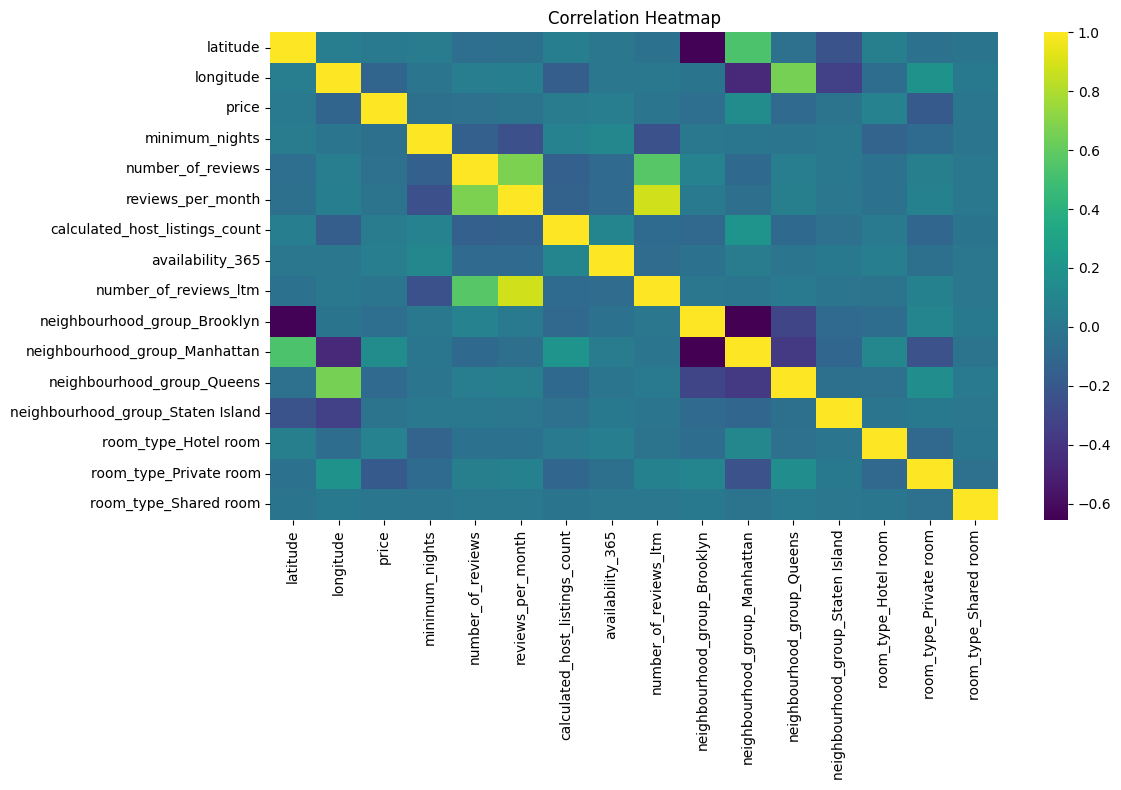

In [22]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

y = data['price']
X = data.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room
11705,40.693680,-73.758050,3,53,1.96,3,88,25,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4174,40.733160,-73.988240,30,25,0.34,1,309,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14134,40.679641,-73.944842,30,0,0.06,1,364,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3922,40.590070,-73.814070,30,186,2.70,1,180,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3506,40.742040,-73.911740,30,147,1.81,3,365,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [24]:
split_shapes = {
    "Training Features": X_train.shape,
    "Training Labels": y_train.shape,
    "Testing Features": X_test.shape,
    "Testing Labels": y_test.shape
}

split_shapes

{'Training Features': (15918, 15),
 'Training Labels': (15918,),
 'Testing Features': (6822, 15),
 'Testing Labels': (6822,)}

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
linear_reg.score(X_train, y_train)

0.054963923645854784

In [31]:
linear_reg.score(X_test, y_test)

0.06848677599312669

In [26]:
y_pred_linear_reg = linear_reg.predict(X_test)

In [27]:
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

mse_linear_reg, r2_linear_reg

(100009.27979432976, 0.06848677599312669)

In [32]:
linear_reg.coef_

array([-3.37953058e+02, -4.40530312e+02, -9.69967035e-01, -1.34843790e-01,
       -2.31364237e+00, -2.62623128e-02,  9.37436056e-02,  1.84678318e-01,
       -5.61443681e+01,  1.88206654e+01, -2.77363718e+01, -1.88064499e+02,
        7.62528631e+01, -1.00067346e+02, -3.23156966e+01])

In [34]:
linear_reg.intercept_

np.float64(-18546.673709463917)